# TNE : K-Means

## G3 SDI - Décision et Apprentissage

### L. Filstroff & P. Chainais - Nov. 2024

Note : Ce TNE est grandement inspiré du Chapitre 9 du livre "Machine Learning avec Scikit-Learn" d'Aurélien Géron.

In [1]:
# Import usual libraries

import numpy as np
from matplotlib import pyplot as plt

Dans un premier temps on va générer des données artificielles en 2D, afin de visualiser le comportement de l'algorithme K-Means.

In [2]:
# Generate fake data

from sklearn.datasets import make_blobs

blob_centers = np.array([[ 0.2,  2.3], [-1.5 ,  2.3], [-2.8,  1.8],
                         [-2.8,  2.8], [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])
X, _ = make_blobs(n_samples=1000, centers=blob_centers, cluster_std=blob_std, random_state=7)

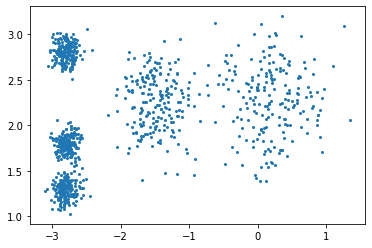

In [3]:
# Visualize data

plt.scatter(X[:,0], X[:,1], s=4)

Au vu des données, on se propose de lancer l'algorithme K-Means avec $K=5$.

In [4]:
from sklearn.cluster import KMeans

K = 5
kmeans = KMeans(n_clusters=K, n_init=10, random_state=0)
kmeans.fit(X)

KMeans(n_clusters=5, random_state=0)

On récupère les assignations aux clusters avec `.labels_` :

In [5]:
y_pred = kmeans.labels_

Et les centroïdes avec `.cluster_centers_` :

In [6]:
kmeans.cluster_centers_

array([[-2.80906999,  1.29323645],
       [ 0.20088156,  2.2751718 ],
       [-2.80248802,  2.8023078 ],
       [-1.47273449,  2.25383102],
       [-2.77986689,  1.79516229]])

Visualisons les clusters et les centroïdes (représentés par une croix rouge) :

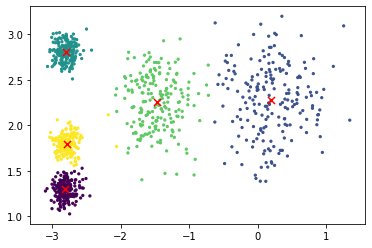

In [7]:
# Visualize clusters + centroids

plt.scatter(X[:,0], X[:,1], c=y_pred, s=5)
for i in range(0,K):
    plt.scatter(kmeans.cluster_centers_[i,0], kmeans.cluster_centers_[i,1], marker = 'x', color = 'r', s = 50)

On dispose aussi d'une méthode `.predict` qui renvoie simplement quel cluster est le plus proche. Cela crée un partitionnement de l'espace. Plus précisément il s'agit d'un diagramme de Voronoï : voir [ici](https://fr.wikipedia.org/wiki/Diagramme_de_Vorono%C3%AF).

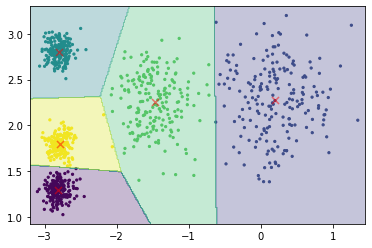

In [8]:
# Voronoi tessellation

mins = X.min(axis=0) - 0.1
maxs = X.max(axis=0) + 0.1
xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], 300),
                     np.linspace(mins[1], maxs[1], 300))
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.scatter(X[:,0], X[:,1], c=y_pred, s=5)
plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]), alpha = 0.3)
for i in range(0,K):
    plt.scatter(kmeans.cluster_centers_[i,0], kmeans.cluster_centers_[i,1], marker = 'x', color = 'r', s = 50, alpha = 0.5)

**Q1.** Ci-dessous se trouve le résultat de deux K-Means avec deux initialisations aléatoires différentes.
* Comment expliquer que les deux solutions soient différentes, et même différentes du résultat précédemment trouvé ?
* Parmi les 2 solutions ci-dessous, laquelle doit-on garder ?
* Qu'est-il donc recommandé de faire ? Quel argument de `KMeans` devrait-on changer ?
* Quelle méthode vue en cours permet d'améliorer l'initialisation de l'algorithme ?

Score silhouette du graphique 1 : 0.6165764829602106
Score silhouette du graphique 2 : 0.5746539857958562


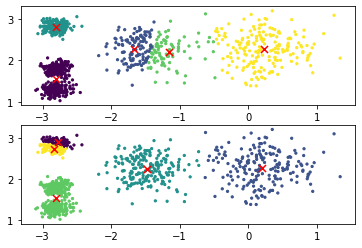

In [ ]:
# K-means variability

from sklearn.metrics import silhouette_score

kmeans1 = KMeans(n_clusters=K, init="random", n_init=1, random_state=1)
kmeans1.fit(X)
kmeans2 = KMeans(n_clusters=K, init="random", n_init=1, random_state=7)
kmeans2.fit(X)

fig, ax = plt.subplots(2, 1)

ax[0].scatter(X[:,0], X[:,1], c=kmeans1.labels_, s=5)
for i in range(0,K):
    ax[0].scatter(kmeans1.cluster_centers_[i,0], kmeans1.cluster_centers_[i,1], marker = 'x', color = 'r', s = 50)

silhouette1 = silhouette_score(X, kmeans1.labels_)

ax[1].scatter(X[:,0], X[:,1], c=kmeans2.labels_, s=5)
for i in range(0,K):
    ax[1].scatter(kmeans2.cluster_centers_[i,0], kmeans2.cluster_centers_[i,1], marker = 'x', color = 'r', s = 50)

silhouette2 = silhouette_score(X, kmeans2.labels_)

print(f"Score Silhouette du graphique 1 : {silhouette1}")
print(f"Score Silhouette du graphique 2 : {silhouette2}")

**Q2.** Les blocs de code ci-dessous proposent deux méthodes pour le choix d'un K optimal :
* La méthode du coude ;
* Le critères de *silhouette*.

Pour chaque critère, quel est le K optimal ? Il vous faudra peut-être creuser dans la doc de scikit-learn pour interpréter le critère de silhouette.

Quelle limite la méthode du coude a-t-elle, que le score de silhouette permet de dépasser ?

In [11]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

inertias = np.zeros(10)
silhouettes = np.zeros(10)

for k in range(2,12):
    kmeans = KMeans(n_clusters=k, n_init=20, random_state=0)
    kmeans.fit(X)
    inertias[k-2] = kmeans.inertia_
    silhouettes[k-2] = silhouette_score(X, kmeans.labels_)

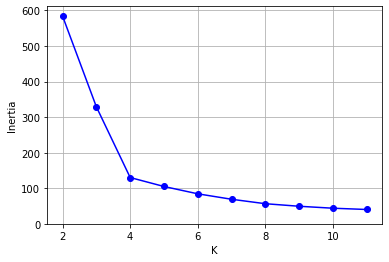

In [12]:
# Elbow method

plt.plot(range(2, 12), inertias, "bo-")
plt.xlabel("K")
plt.ylabel("Inertia")
plt.ylim(0)
plt.grid()

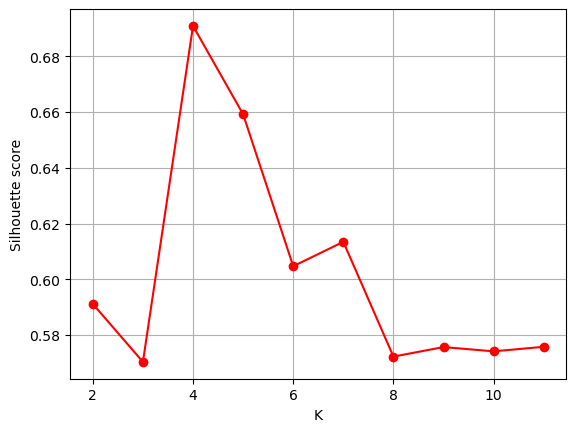

In [12]:
# Silhouette 

plt.plot(range(2, 12), silhouettes, "ro-")
plt.xlabel("K")
plt.ylabel("Silhouette score")
plt.grid()

**Q3.** Application : Segmentation d'image. Interprétez le code, et commentez la figure.

In [13]:
import PIL

image = np.asarray(PIL.Image.open('ladybug.png'))
X = image.reshape(-1, 3)

segmented_imgs = []

K_list = (2, 4, 8)
for K in K_list:
    kmeans = KMeans(n_clusters=K, n_init=10, random_state=0).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_imgs.append(segmented_img.reshape(image.shape))

In [14]:
kmeans.labels_.shape

(426400,)

In [15]:
kmeans.cluster_centers_[kmeans.labels_]

array([[ 5.37377878, 26.97162836,  1.41747486],
       [ 5.37377878, 26.97162836,  1.41747486],
       [ 5.37377878, 26.97162836,  1.41747486],
       ...,
       [23.21577493, 61.93785481,  3.85904044],
       [23.21577493, 61.93785481,  3.85904044],
       [ 5.37377878, 26.97162836,  1.41747486]])

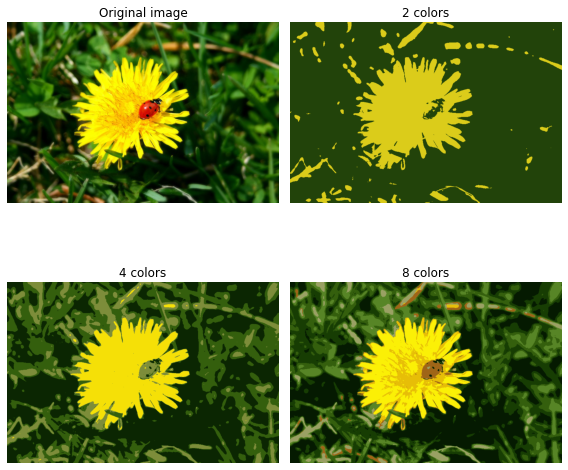

In [16]:
fig, ax = plt.subplots(2,2,figsize=(8,8))

ax[0,0].set_title("Original image")
ax[0,0].imshow(image)
ax[0,0].set_axis_off()

ax[0,1].set_title("2 colors")
ax[0,1].imshow(segmented_imgs[0]/255)
ax[0,1].set_axis_off()

ax[1,0].set_title("4 colors")
ax[1,0].imshow(segmented_imgs[1]/255)
ax[1,0].set_axis_off()

ax[1,1].set_title("8 colors")
ax[1,1].imshow(segmented_imgs[2]/255)
ax[1,1].set_axis_off()

plt.tight_layout()